In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
from pprint import pprint
from datetime import datetime
import os
import csv
from pathlib import Path

In [2]:
fire_data_merged = Path("../outputs/geojson/ca_fire_all.csv")
fire_data_merged_df = pd.read_csv(fire_data_merged, encoding="ISO-8859-1")
fire_data_merged_df.head()

,Unnamed: 0,ALARM_DATE,CONT_DATE,CAUSE,GIS_ACRES
0,0,2013-08-03,2013-08-04,Miscellaneous,10.934740
1,1,2013-08-09,2013-08-09,Miscellaneous,206.080700
2,2,2013-06-09,2013-06-09,Equipment Use,17.784730
3,3,2013-09-07,2013-09-09,Miscellaneous,5.024302
4,4,2013-05-13,2013-05-14,Vehicle,49.124420


In [3]:
fire_data_merged_df.loc[fire_data_merged_df['ALARM_DATE'] == '0219-05-29', 'ALARM_DATE'] = '2019-05-09'
fire_data_merged_df.loc[fire_data_merged_df['CONT_DATE'] == '0219-05-29', 'CONT_DATE'] = '2019-05-09'

In [4]:
fire_data_merged_df['CONT_DATE'] = pd.to_datetime(fire_data_merged_df['CONT_DATE'])
fire_data_merged_df['ALARM_DATE'] = pd.to_datetime(fire_data_merged_df['ALARM_DATE'])
fire_data_merged_df['Duration'] = fire_data_merged_df['CONT_DATE'] - fire_data_merged_df['ALARM_DATE']

In [5]:
# Replace 'vehicle' and 'railroad' with 'transportation' in 'causes' column
fire_data_merged_df['CAUSE'].replace(['Vehicle', 'Railroad', 'Aircraft'], 'Transportation', inplace=True)

C:\Users\Long\AppData\Local\Temp\ipykernel_39604\1690940405.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fire_data_merged_df['CAUSE'].replace(['Vehicle', 'Railroad', 'Aircraft'], 'Transportation', inplace=True)


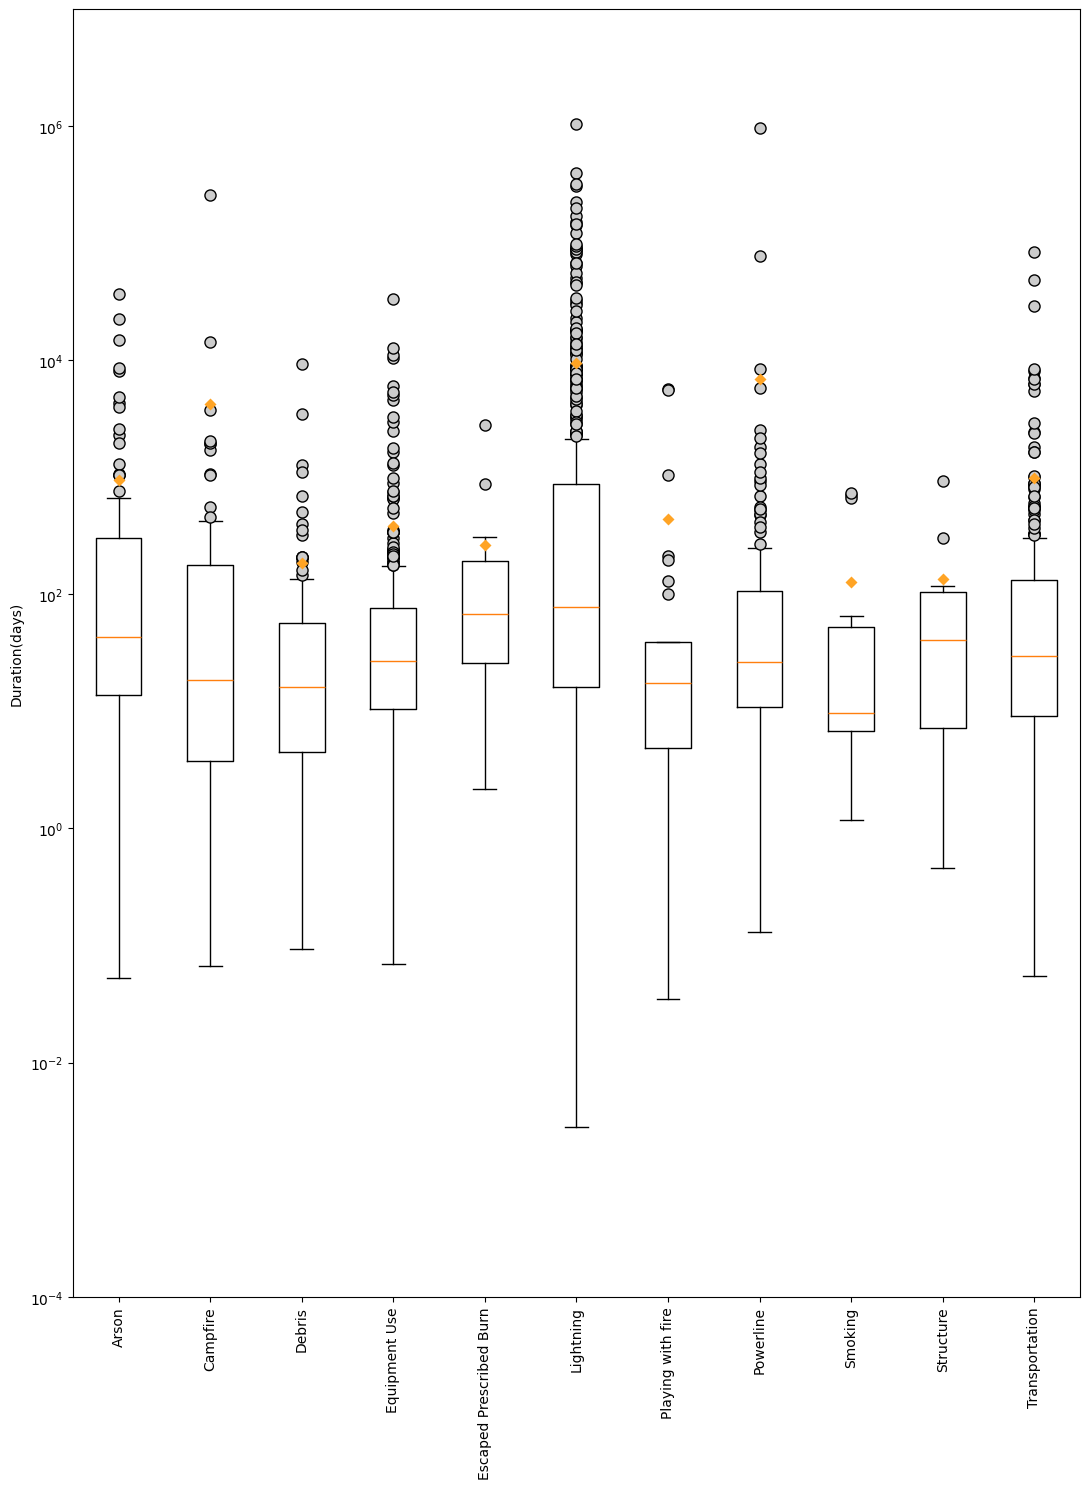

In [37]:
cause_list = fire_data_merged_df['CAUSE'].unique()
value_to_remove = 'Miscellaneous'
new_arr = cause_list[cause_list != value_to_remove]
value_to_remove = 'Unknown/Unidentified'
cause_list = new_arr[new_arr != value_to_remove]
cause_gis = fire_data_merged_df[fire_data_merged_df['CAUSE'].isin(cause_list)]
grouped_data = cause_gis.groupby('CAUSE')['GIS_ACRES'].apply(list)

# # Create a box plot
# Highlight potential outliers by changing their color or style
plt.figure(figsize=(11,15))
meanprops = dict(marker='D', markeredgecolor='none',markerfacecolor='#ffa425')
plt.boxplot(grouped_data.values, tick_labels=grouped_data.index, showfliers=True, patch_artist=False, 
            flierprops=dict(marker='o', markerfacecolor='#ccc', markersize=8), meanprops = meanprops,showmeans = True
)

# Add labels and title
plt.ylim(0.0001, 10000000)
plt.xticks(rotation=90)
plt.ylabel('Duration(days)')
plt.yscale('log')
plt.tight_layout()
plt.show()

In [42]:
fire_data_merged_df['Duration_days'] = fire_data_merged_df['Duration'].dt.days
fire_data_merged_df.sort_values(by='Duration')

,Unnamed: 0,ALARM_DATE,CONT_DATE,CAUSE,GIS_ACRES,Duration,Duration_days
422,125,2015-12-03,2015-03-13,Unknown/Unidentified,22.354660,-265 days,-265
437,140,2015-11-08,2015-08-13,Unknown/Unidentified,9.354076,-87 days,-87
1019,422,2017-09-27,2017-08-29,Arson,113.054400,-29 days,-29
1941,426,2020-12-13,2020-12-13,Powerline,7.268880,0 days,0
1934,419,2020-06-04,2020-06-04,Unknown/Unidentified,3.485558,0 days,0
...,...,...,...,...,...,...,...
463,166,2015-06-17,2015-12-31,Miscellaneous,31284.440000,197 days,197
8,8,2013-05-30,2013-12-18,Miscellaneous,30267.690000,202 days,202
38,38,2013-05-01,2013-12-09,Miscellaneous,6896.198000,222 days,222
2163,154,2021-09-07,2022-09-07,Equipment Use,25.031430,365 days,365


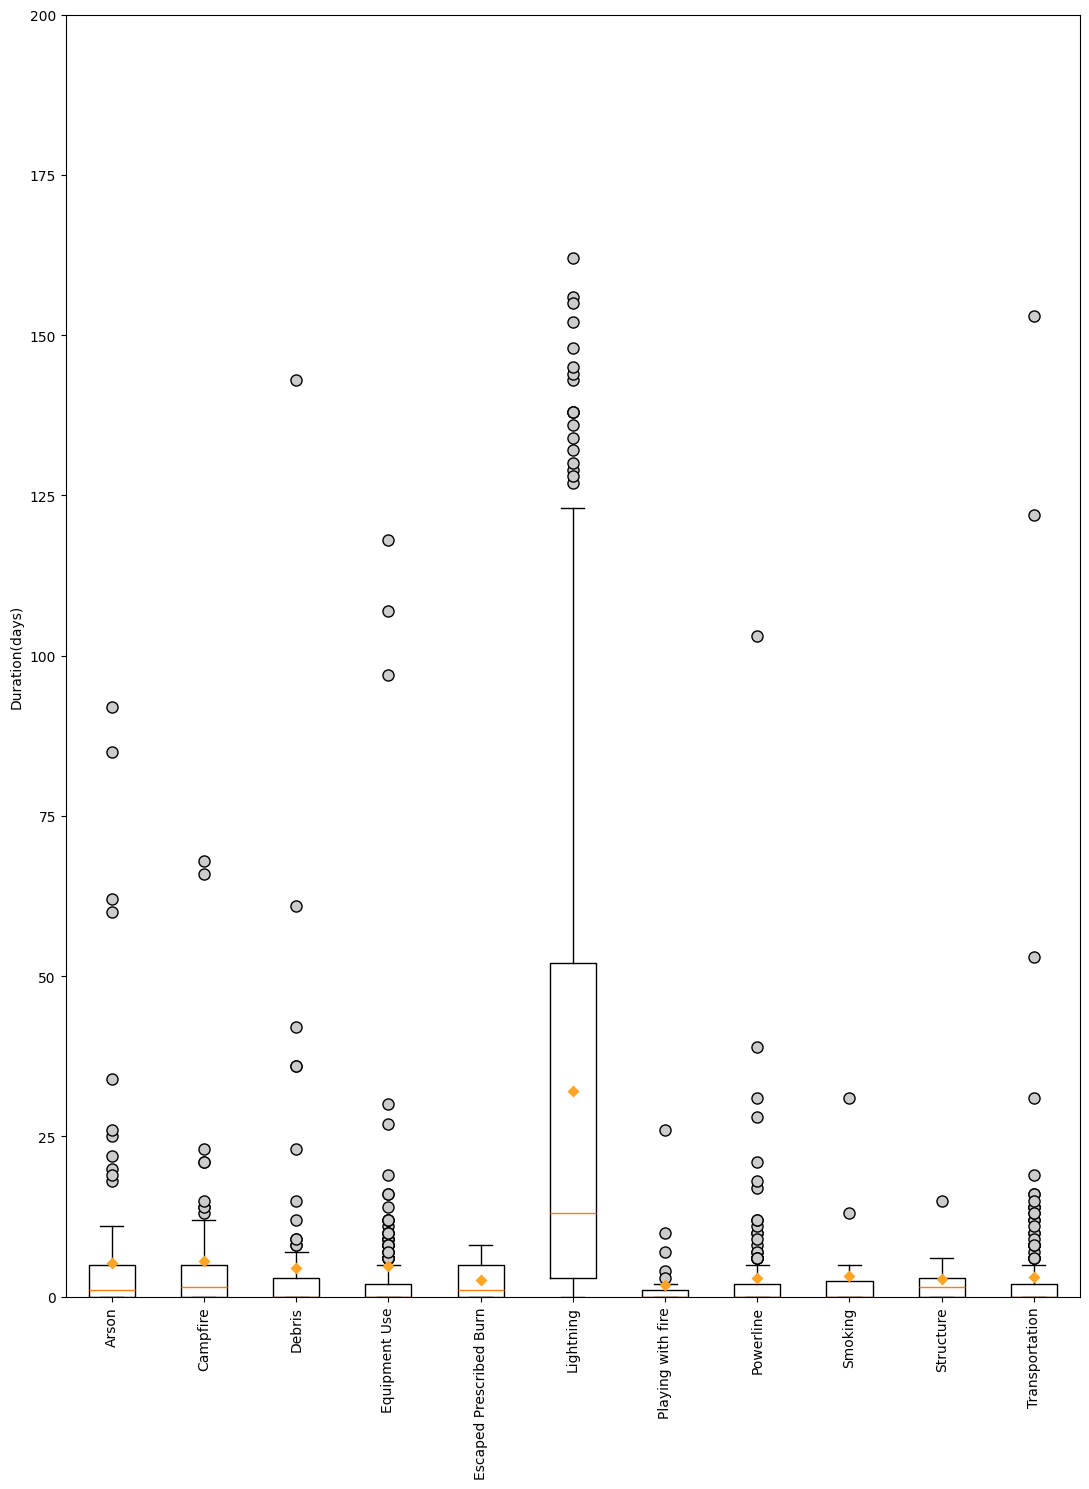

In [38]:
cause_list = fire_data_merged_df['CAUSE'].unique()
value_to_remove = 'Miscellaneous'
new_arr = cause_list[cause_list != value_to_remove]
value_to_remove = 'Unknown/Unidentified'
cause_list = new_arr[new_arr != value_to_remove]
cause_gis = fire_data_merged_df[fire_data_merged_df['CAUSE'].isin(cause_list)]
grouped_data = cause_gis.groupby('CAUSE')['Duration_days'].apply(list)

# # Create a box plot
# Highlight potential outliers by changing their color or style
plt.figure(figsize=(11,15))
meanprops = dict(marker='D', markeredgecolor='none',markerfacecolor='#ffa425')
plt.boxplot(grouped_data.values, tick_labels=grouped_data.index, showfliers=True, patch_artist=False, 
            flierprops=dict(marker='o', markerfacecolor='#ccc', markersize=8), meanprops = meanprops,showmeans = True
)

# Add labels and title
plt.ylim(0, 200)
plt.xticks(rotation=90)
plt.ylabel('Duration(days)')
# plt.yscale('log')
plt.tight_layout()
plt.show()

In [7]:
fire_data_23 = Path("outputs/fire_source_2023.csv")
fire_data_22 = Path("outputs/fire_source_2022.csv")
fire_data_21 = Path("outputs/fire_source_2021.csv")
fire_data_20 = Path("outputs/fire_source_2020.csv")
fire_data_19 = Path("outputs/fire_source_2019.csv")
fire_data_17 = Path("outputs/fire_source_2017.csv")
fire_data_15 = Path("outputs/fire_source_2015.csv")
fire_data_13 = Path("outputs/fire_source_2013.csv")

In [8]:
fire_2023_df = pd.read_csv(fire_data_23, encoding="ISO-8859-1")
fire_2022_df = pd.read_csv(fire_data_22, encoding="ISO-8859-1")
fire_2021_df = pd.read_csv(fire_data_21, encoding="ISO-8859-1")
fire_2020_df = pd.read_csv(fire_data_20, encoding="ISO-8859-1")
fire_2019_df = pd.read_csv(fire_data_19, encoding="ISO-8859-1")
fire_2017_df = pd.read_csv(fire_data_17, encoding="ISO-8859-1")
fire_2015_df = pd.read_csv(fire_data_15, encoding="ISO-8859-1")
fire_2013_df = pd.read_csv(fire_data_13, encoding="ISO-8859-1")
fire_2013_df

,Causes,Average Duration (days),Average GIS Acres,Number of Occurences (in the Year)
0,Lightning,26.00,997.18,56
1,Equipment Use,1.53,138.83,34
2,Smoking,1.00,232.97,6
3,Campfire,14.80,17662.81,15
4,Debris,1.50,133.87,8
5,Railroad,0.00,17.30,2
6,Arson,12.33,5197.43,9
7,Playing with fire,0.00,41.23,4
8,Vehicle,0.92,100.82,12
9,Powerline,1.79,66.13,14


In [9]:
merged_df = pd.concat([fire_2013_df, fire_2015_df], ignore_index=True)
summed_df = merged_df.groupby('Causes').sum().reset_index()

In [10]:
summed_df

,Causes,Average Duration (days),Average GIS Acres,Number of Occurences (in the Year)
0,Arson,18.83,5690.82,17
1,Campfire,17.42,19598.25,23
2,Debris,24.35,197.23,21
3,Equipment Use,3.39,625.83,62
4,Escaped Prescribed Burn,7.00,1012.83,6
5,Lightning,58.89,4870.98,165
6,Playing with fire,9.00,2011.99,7
7,Powerline,3.91,455.19,22
8,Railroad,0.00,17.30,2
9,Smoking,1.00,240.44,7


In [11]:
merged_df = pd.concat([summed_df, fire_2017_df], ignore_index=True)
merged_df = pd.concat([merged_df, fire_2019_df], ignore_index=True)
merged_df = pd.concat([merged_df, fire_2020_df], ignore_index=True)
merged_df = pd.concat([merged_df, fire_2021_df], ignore_index=True)
merged_df = pd.concat([merged_df, fire_2022_df], ignore_index=True)
merged_df = pd.concat([merged_df, fire_2023_df], ignore_index=True)
summed_df = merged_df.groupby('Causes').sum().reset_index()

In [12]:
summed_df

,Causes,Average Duration (days),Average GIS Acres,Number of Occurences (in the Year)
0,Aircraft,0.00,3.08,2
1,Arson,44.64,8974.91,137
2,Campfire,37.33,20492.40,68
3,Debris,38.68,1560.30,112
4,Equipment Use,34.43,2589.41,328
5,Escaped Prescribed Burn,14.04,1531.81,21
6,Lightning,250.27,71938.48,534
7,Playing with fire,12.37,2556.56,30
8,Powerline,25.09,65635.14,155
9,Railroad,4.00,261.42,5


In [13]:
summed_df.rename(columns={'Number of Occurences (in the Year)': 'Number of Occurences (Overall)'}, inplace=True)
summed_df['Average Duration (days)'] = summed_df['Average Duration (days)']/8
summed_df['Average GIS Acres'] = summed_df['Average GIS Acres']/8
summed_df['Number of Occurences (Overall)'] = summed_df['Number of Occurences (Overall)']/8
summed_df

,Causes,Average Duration (days),Average GIS Acres,Number of Occurences (Overall)
0,Aircraft,0.00000,0.38500,0.250
1,Arson,5.58000,1121.86375,17.125
2,Campfire,4.66625,2561.55000,8.500
3,Debris,4.83500,195.03750,14.000
4,Equipment Use,4.30375,323.67625,41.000
5,Escaped Prescribed Burn,1.75500,191.47625,2.625
6,Lightning,31.28375,8992.31000,66.750
7,Playing with fire,1.54625,319.57000,3.750
8,Powerline,3.13625,8204.39250,19.375
9,Railroad,0.50000,32.67750,0.625


In [14]:
summed_df.to_csv("outputs/fire_source_merged.csv",
                  encoding="utf-8", index=False, header=True)

In [15]:
man_duration = 0
man_GIS_acres = 0
man_oc = 0
nat_duration = 0
nat_GIS_acres = 0
nat_oc = 0
for index, row in summed_df.iterrows():
    if row['Causes'] == 'Lightning':
        nat_duration += row['Average Duration (days)']
        nat_GIS_acres += row['Average GIS Acres']
        nat_oc += row['Number of Occurences (Overall)']
    else:
        man_duration += row['Average Duration (days)'] 
        man_GIS_acres += row['Average GIS Acres']
        man_oc += row['Number of Occurences (Overall)']

man_vs_nature_df = pd.DataFrame({'Causes':['Man-Made', 'Natural'], 
                                 'Average Duration (days)': [man_duration, nat_duration], 
                                 'Average GIS Acres': [man_GIS_acres, nat_GIS_acres],
                                 'Number of Occurences (Overall)':[man_oc, nat_oc]
                                })
man_vs_nature_df

,Causes,Average Duration (days),Average GIS Acres,Number of Occurences (Overall)
0,Man-Made,33.08500,13862.60375,141.75
1,Natural,31.28375,8992.31000,66.75


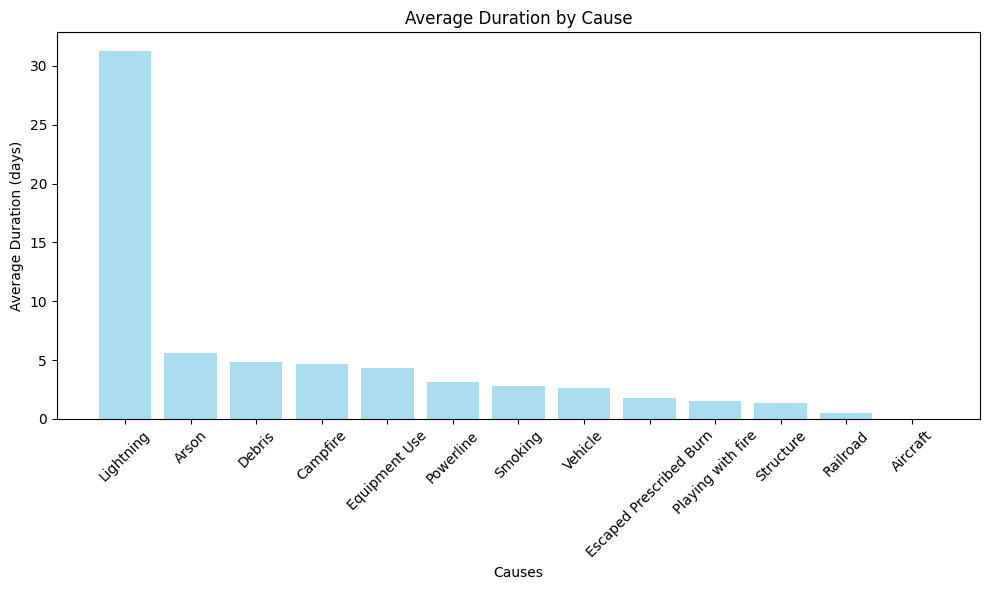

In [16]:
summed_df = summed_df.sort_values(by='Average Duration (days)', ascending=False)
plt.figure(figsize=(10, 6))

plt.bar(summed_df['Causes'], summed_df['Average Duration (days)'],
        color='skyblue', alpha=0.7)

plt.xlabel('Causes')
plt.ylabel('Average Duration (days)')
plt.title('Average Duration by Cause')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

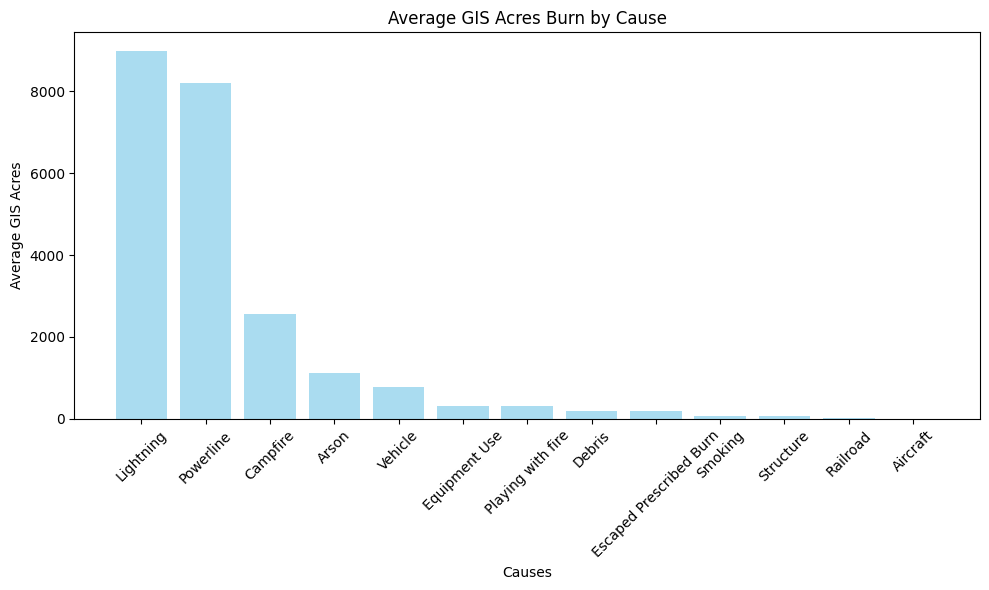

In [17]:
summed_df = summed_df.sort_values(by='Average GIS Acres', ascending=False)
plt.figure(figsize=(10, 6))

plt.bar(summed_df['Causes'], summed_df['Average GIS Acres'],
        color='skyblue', alpha=0.7)

plt.xlabel('Causes')
plt.ylabel('Average GIS Acres')
plt.title('Average GIS Acres Burn by Cause')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

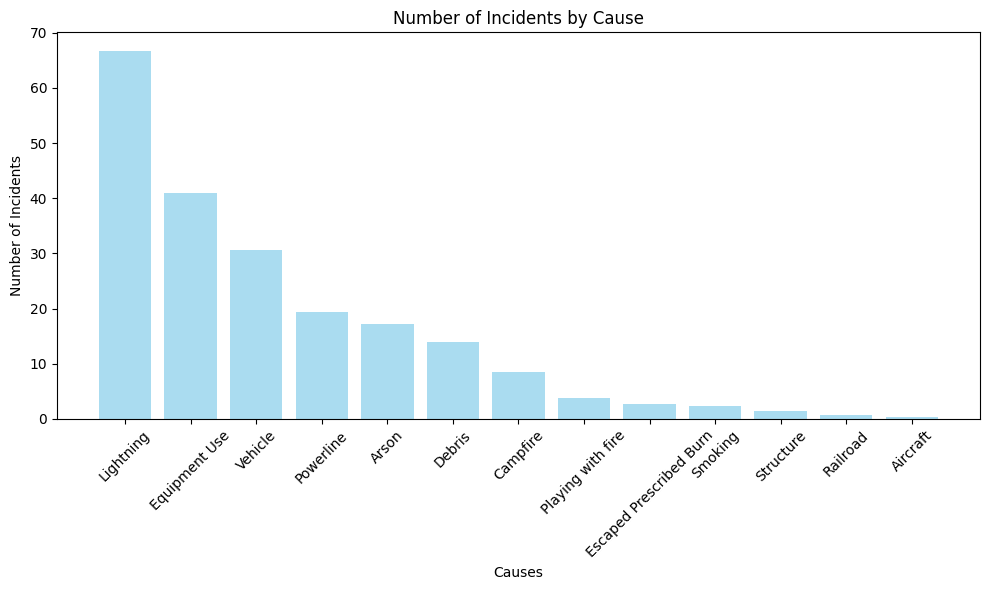

In [18]:
summed_df = summed_df.sort_values(by='Number of Occurences (Overall)', ascending=False)
plt.figure(figsize=(10, 6))

plt.bar(summed_df['Causes'], summed_df['Number of Occurences (Overall)'],
        color='skyblue', alpha=0.7)

plt.xlabel('Causes')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents by Cause')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

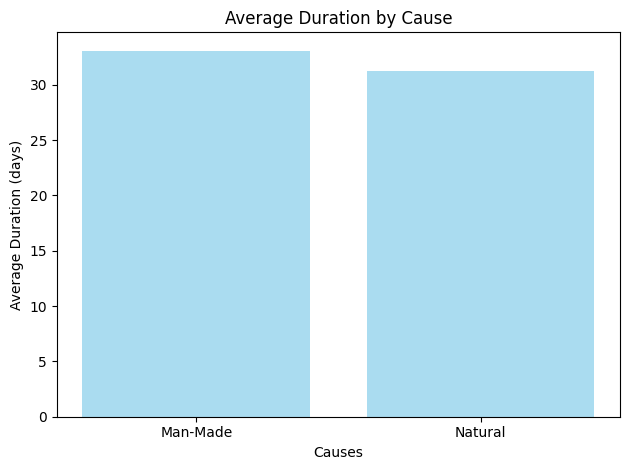

In [19]:
plt.bar(man_vs_nature_df['Causes'], man_vs_nature_df['Average Duration (days)'],
        color='skyblue', alpha=0.7)

plt.xlabel('Causes')
plt.ylabel('Average Duration (days)')
plt.title('Average Duration by Cause')

plt.tight_layout()
plt.show()

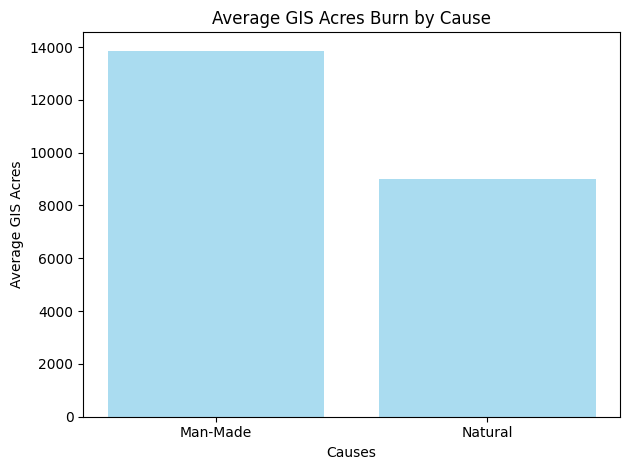

In [20]:
plt.bar(man_vs_nature_df['Causes'], man_vs_nature_df['Average GIS Acres'],
        color='skyblue', alpha=0.7)

plt.xlabel('Causes')
plt.ylabel('Average GIS Acres')
plt.title('Average GIS Acres Burn by Cause')

plt.tight_layout()
plt.show()

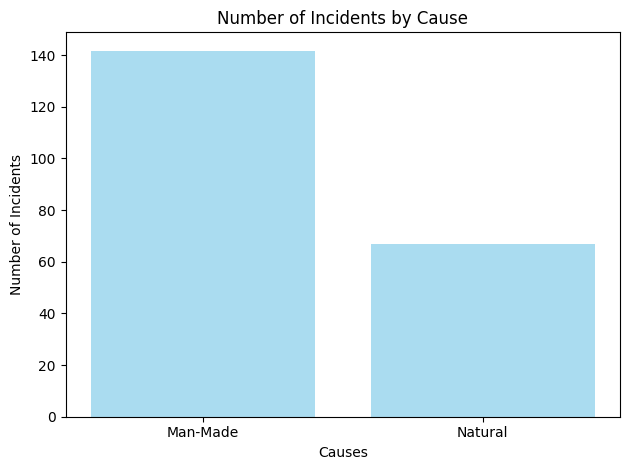

In [21]:
plt.bar(man_vs_nature_df['Causes'], man_vs_nature_df['Number of Occurences (Overall)'],
        color='skyblue', alpha=0.7)

plt.xlabel('Causes')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents by Cause')

plt.tight_layout()
plt.show()